# Pizza or steak?

The code below classifys two types of images: a pizza and a steak (images are in the folder '\pizza_steak'). CNN based on tf is used. The accuracy is 0.88, auc = 0.96. 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from  tensorflow.keras        import layers
from  tensorflow.keras.models import Sequential

In [2]:
import os
import pathlib
import time
import warnings

In [3]:
import PIL
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [5]:
os.chdir('C:\\Users\\as271\\ml_study\\tensor_flow')
os.getcwd()

'C:\\Users\\as271\\ml_study\\tensor_flow'

In [6]:
#Data original: https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [7]:
# Directories
data_dir = pathlib.Path('C:\\Users\\as271\\ml_study\\tensor_flow\pizza_steak')
data_dir = pathlib.Path('C:\\Users\\as271\\ml_study\\tensor_flow')
dir_train   = "pizza_steak/train/"
dir_test    = "pizza_steak/test/"
train_dir_p = "pizza_steak/train/pizza/"
train_dir_s = "pizza_steak/train/steak/"
test_dir_p  = "pizza_steak/test/pizza/"
test_dir_s  = "pizza_steak/test/steak/"

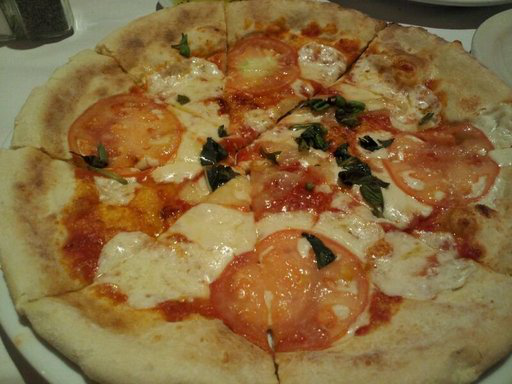

In [8]:
# Look at an image example
steak = list(data_dir.glob(train_dir_s+'*'))
pizza = list(data_dir.glob(train_dir_p+'*'))
PIL.Image.open(str(pizza[0]))
#, PIL.Image.open(str(steak[0]))

In [9]:
image_height = image_width = 256

# Download images for train, validation and test set

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(dir_train,
                                                       validation_split=0.2,
                                                       labels='inferred',
                                                       label_mode = 'int',
                                                       batch_size = 32,
                                                       image_size = (image_height,image_width),
                                                       subset     = "training",
                                                       seed       = 1           )

Found 1500 files belonging to 2 classes.
Using 1200 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(dir_train,
                                                       validation_split=0.2,
                                                       labels='inferred',
                                                       label_mode = 'int',
                                                       batch_size = 32,
                                                       image_size = (image_height,image_width),
                                                       subset     = "validation",
                                                       seed       = 1           )

Found 1500 files belonging to 2 classes.
Using 300 files for validation.


In [12]:
test_ds = tf.keras.utils.image_dataset_from_directory(dir_test,
                                                       labels='inferred',
                                                       label_mode = 'int',
                                                       batch_size = 32,
                                                       image_size = (image_height,image_width),
                                                       seed       = 2)

Found 500 files belonging to 2 classes.


In [13]:
type(test_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [14]:
class_names = test_ds.class_names
print(class_names)

['pizza', 'steak']


In [15]:
# get labels and images from test_ds
im_list   = []
label_list = []
for im,l in test_ds:
    im_list.append(im)
    label_list.append(l)
labels_test = np.concatenate(label_list, axis=0)
images_test = np.concatenate(im_list   , axis=0)
# the code in this box gives differant results when been repearted. It looks like the iteration over the dataset is rendom

In [16]:
images_test.shape, type(images_test)

((500, 256, 256, 3), numpy.ndarray)

<Figure size 640x480 with 0 Axes>

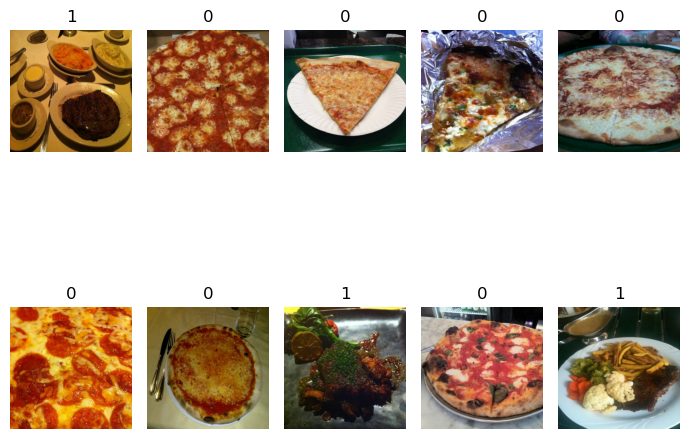

In [17]:
# Lets visually sheck the labels
plt.tight_layout()
plt.show()
lab = labels_test[:10]
fig, axes = plt.subplots(2, 5, figsize=(7, 7))
for i, (ax,l) in enumerate(zip(axes.flat,lab)):
    imi = images_test[i,:,:,:].astype(np.uint8)
    impil = PIL.Image.fromarray(imi)
    ax.imshow(impil)
    ax.set_title(l)
    ax.axis("off")
plt.tight_layout()
plt.show()

In [18]:
# to predict ovefitting prepare data augmentation
data_augmentation = tf.keras.Sequential(
    [
    layers.RandomFlip("horizontal", input_shape=(image_height,image_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
    ]
    )

# Form a model

In [19]:
numclasses = len(class_names)
model = tf.keras.Sequential(
        [data_augmentation,
        layers.Rescaling(1./255.),
        layers.Conv2D(16, 3, padding = 'same', activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(32, 3, padding = 'same', activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(64, 3, padding = 'same', activation='relu'),
        layers.MaxPool2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')]
        )

In [20]:
#help(tf.keras.metrics.binary_crossentropy)

In [21]:
model.compile(
            optimizer = 'adam',
            loss      = tf.keras.losses.binary_crossentropy,
            metrics   = ['accuracy',])

In [22]:
epochs = 30
earlystop = tf.keras.callbacks.EarlyStopping( patience = 7, min_delta = 0.001 )
start = time.perf_counter()
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs          = epochs,
                    callbacks       = earlystop)
end     = time.perf_counter()
t = end - start
print("time in min", t/60)

Epoch 1/30
38/38 [==============================] - 71s 2s/step - loss: 0.7193 - accuracy: 0.6083 - val_loss: 0.5322 - val_accuracy: 0.7400
Epoch 2/30
38/38 [==============================] - 67s 2s/step - loss: 0.4885 - accuracy: 0.7700 - val_loss: 0.5868 - val_accuracy: 0.7700
Epoch 3/30
38/38 [==============================] - 68s 2s/step - loss: 0.4250 - accuracy: 0.8133 - val_loss: 0.4903 - val_accuracy: 0.7733
Epoch 4/30
38/38 [==============================] - 68s 2s/step - loss: 0.4361 - accuracy: 0.8008 - val_loss: 0.4223 - val_accuracy: 0.8067
Epoch 5/30
38/38 [==============================] - 102s 3s/step - loss: 0.3839 - accuracy: 0.8300 - val_loss: 0.4022 - val_accuracy: 0.8267
Epoch 6/30
38/38 [==============================] - 64s 2s/step - loss: 0.3702 - accuracy: 0.8408 - val_loss: 0.4061 - val_accuracy: 0.8167
Epoch 7/30
38/38 [==============================] - 69s 2s/step - loss: 0.3473 - accuracy: 0.8575 - val_loss: 0.4379 - val_accuracy: 0.8067
Epoch 8/30
38/38 [=

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

In [24]:
model.evaluate(val_ds)

10/10 [==============================] - 5s 408ms/step - loss: 0.4203 - accuracy: 0.8333


[0.42025741934776306, 0.8333333134651184]

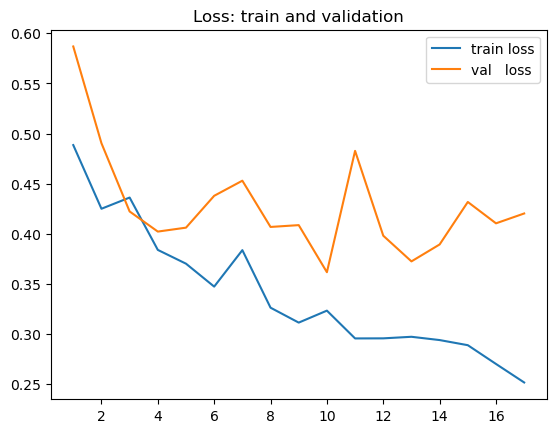

In [25]:
story = pd.DataFrame(history.history)
epoch_n = story.index.tolist()
epoch_n.pop(0)
plt.plot(epoch_n , story .loc[1:,'loss'    ], label = 'train loss')
plt.plot(epoch_n , story .loc[1:,'val_loss'], label = 'val   loss')
plt.legend()
plt.title('Loss: train and validation')
plt.show()

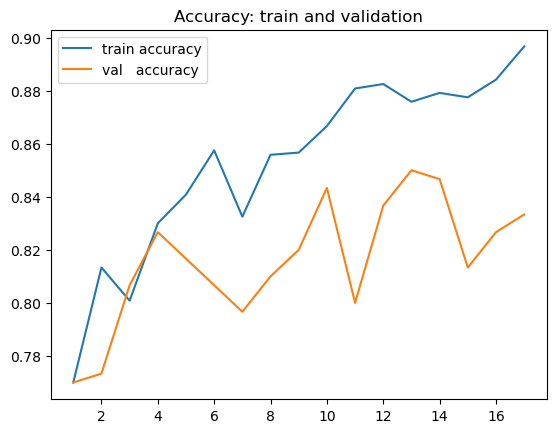

In [26]:
plt.plot(epoch_n , story .loc[1:,'accuracy'    ], label = 'train accuracy')
plt.plot(epoch_n , story .loc[1:,'val_accuracy'], label = 'val   accuracy')
plt.legend()
plt.title('Accuracy: train and validation')
plt.show()

# Model metrics on test images

In [27]:
y_pred_prob  = model.predict(images_test)

16/16 [==============================] - 7s 406ms/step


In [28]:
#y_pred_prob 

In [30]:
y_pred = np.round(y_pred_prob)

In [31]:
confusion_matrix(labels_test,y_pred)

array([[188,  62],
       [  9, 241]], dtype=int64)

In [32]:
print(classification_report(labels_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       250
           1       0.80      0.96      0.87       250

    accuracy                           0.86       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.87      0.86      0.86       500



In [34]:
roc_auc_score(labels_test,y_pred_prob)

0.957488

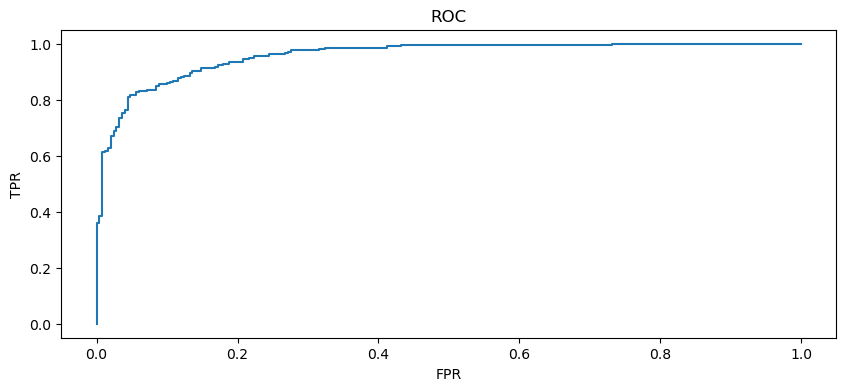

In [35]:
fpr,tpr,threshold = roc_curve(labels_test,y_pred_prob)
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
#plt.label('fpr','tpr')
plt.show()

In [36]:
model.evaluate(test_ds) #Evalute the model on test set

16/16 [==============================] - 7s 413ms/step - loss: 0.3279 - accuracy: 0.8580


[0.3279361128807068, 0.8579999804496765]

# To predict  images

In [37]:
predict_dir = "pizza_steak/recognize/"
predict_ds  = tf.keras.utils.image_dataset_from_directory(predict_dir,
                                                       labels     = None,
                                                       label_mode = None,
                                                       batch_size = 32,
                                                       shuffle    = False, 
                                                       image_size = (image_height,image_width))
# images is downlowded in alphabet order!

Found 20 files belonging to 1 classes.


In [38]:
prediction_prob =  model.predict(predict_ds)

1/1 [==============================] - 0s 347ms/step


In [39]:
prediction      = np.round(prediction_prob)
predicted_class = [class_names[int(pr[0])] for pr in prediction]

In [40]:
im_list = []
for im in predict_ds: im_list.append(im)
images_predict  = np.concatenate(im_list   , axis=0)

<Figure size 640x480 with 0 Axes>

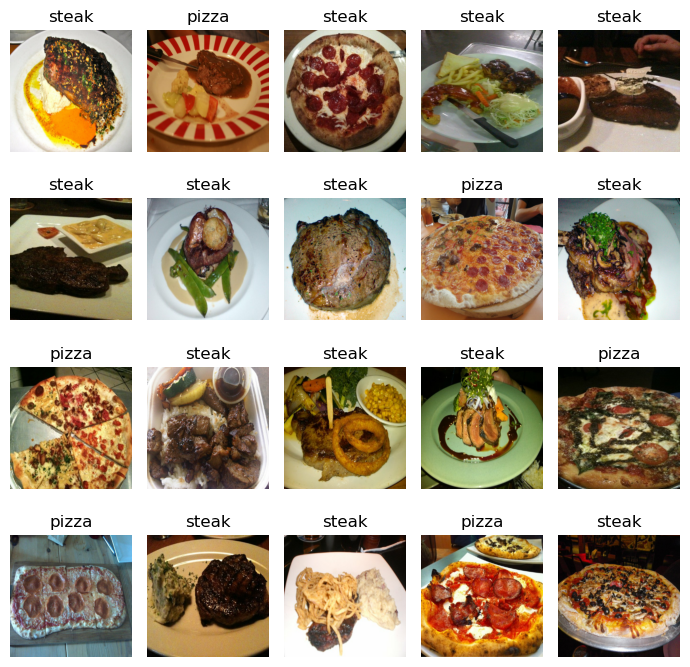

In [41]:
# Let us visually sheck the forecast
for im in predict_ds: im_list.append(im)
images_predict  = np.concatenate(im_list   , axis=0)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 5, figsize=(7, 7))
for i, (ax,title_label) in enumerate(zip(axes.flat,predicted_class)):
    imi = images_predict[i,:,:,:].astype(np.uint8)
    impil = PIL.Image.fromarray(imi)
    ax.imshow(impil)
    ax.set_title(title_label)
    ax.axis("off")
plt.tight_layout()
plt.show()